# Kings County Housing Bake-off 
## by Gary Schwaeber

The goal of this project is explore housing data from Kings County, WA and to use the data to build a model to predict housing prices. 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from test_and_residual_plot_functions import test_data, test_data_log_target, residual_plot, residual_plot_log

import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('data/kc_house_data_train.csv', index_col = 0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


Let's see a distribution of housing prices

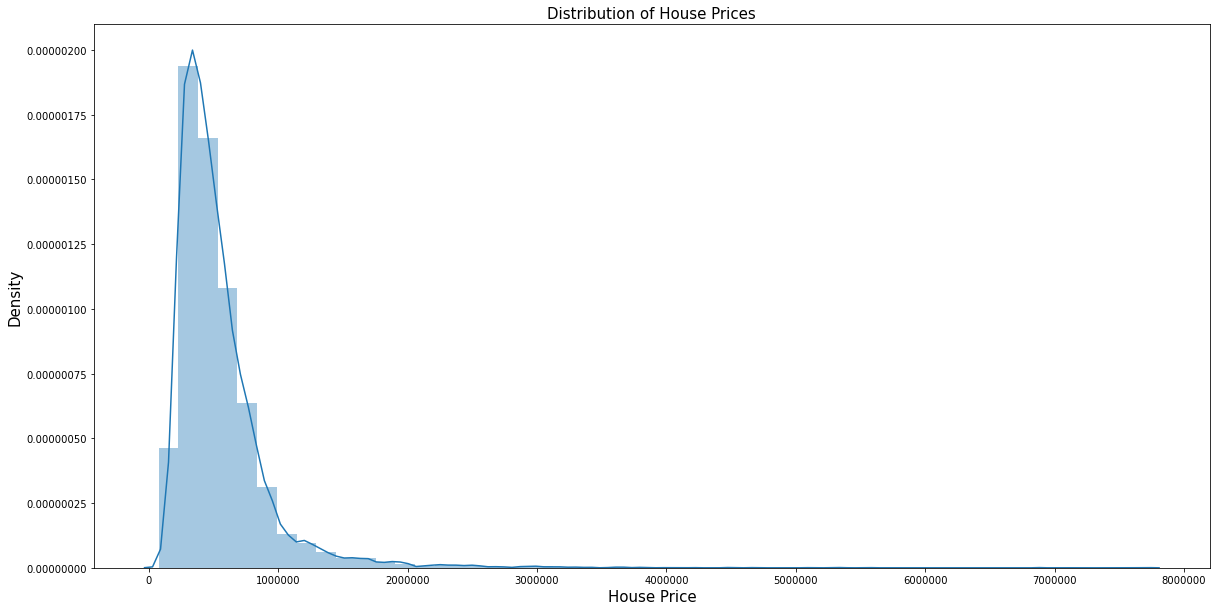

In [6]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df['price'])
ax.set_title('Distribution of House Prices', fontsize = 15)
ax.set_xlabel('House Price', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Looks Normal but right skewed due to the multi-million dollar homes in the data. Looking below, taking the natural log of price normalizes the distribution. This could be useful for modeling later.


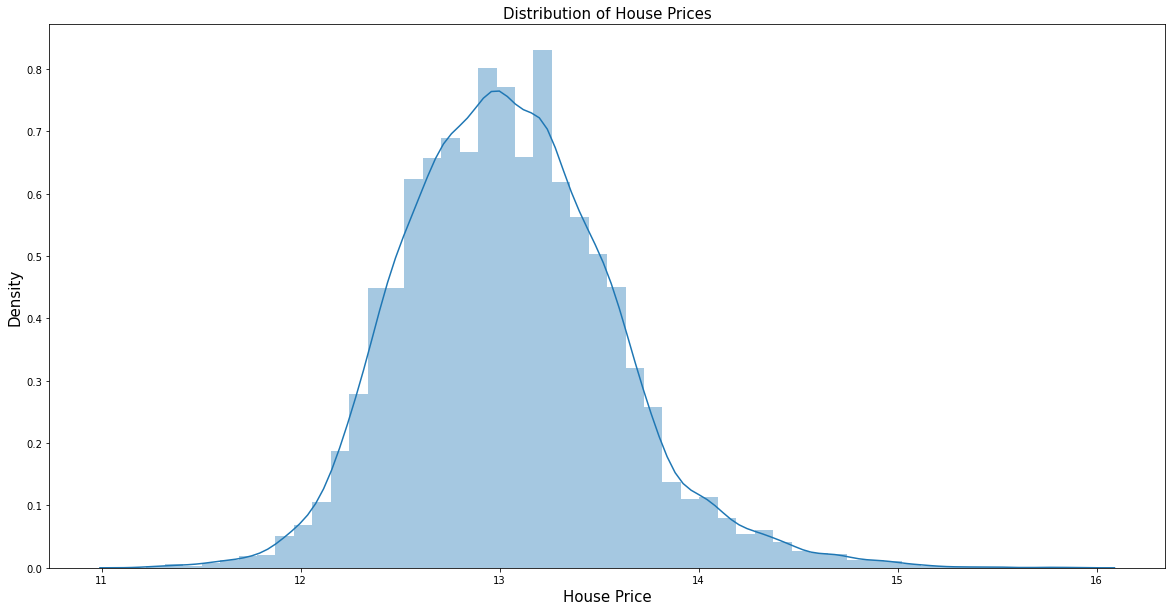

In [7]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(np.log(df['price']))
ax.set_title('Distribution of House Prices', fontsize = 15)
ax.set_xlabel('House Price', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

The below heatmap shows correlations of some of the features with each other and price. Given the higher correlation with price, sqft_living, bathrooms, and grade, these features require further investigation.

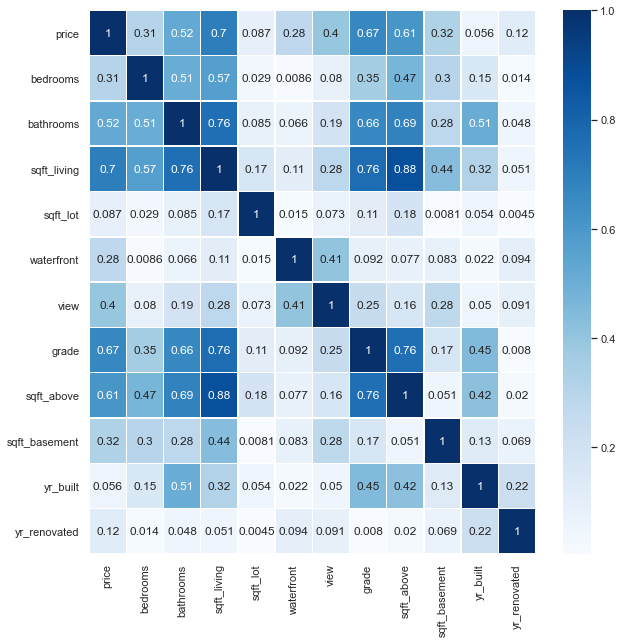

In [8]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(df.loc[:,[
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
    'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']].corr().applymap(abs), linewidths=.5, cmap="Blues", annot = True)
plt.show()

Checking if there is any weirdness with bathrooms:

In [9]:
df[df['bathrooms']< .74]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3032,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
4622,7987400316,20140814T000000,255000.0,1,0.5,880,1642,1.0,0,0,3,6,500,380,1910,0,98126,47.5732,-122.372,1410,2992
5424,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
7093,7129800036,20150114T000000,109000.0,2,0.5,580,6900,1.0,0,0,3,5,580,0,1941,0,98118,47.5135,-122.262,1570,5040
9060,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
9286,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
12674,2991000160,20141212T000000,312500.0,4,0.5,2300,5570,2.0,0,0,3,8,2300,0,1996,0,98092,47.3285,-122.168,1820,6371


I don't think these houses actually have 0 bathrooms, I will  impute using bathrooms per sqft living

In [10]:
bathroom_per_sqftl = (df[df['bathrooms']>0]['bathrooms'] / df[df['bathrooms']>0]['sqft_living']).mean()
bathroom_per_sqftl

0.0010755476417730245

In [11]:
df['bathrooms'] = np.where(df['bathrooms'] < .74, np.round(df['sqft_living'] * bathroom_per_sqftl),  df['bathrooms'])

I will do similar with bedrooms. It's possible they are studios or shacks, but given the sqft of living space for most of them, most likely they are errors. 

In [12]:
df[df['bedrooms']< 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,0,3.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,0,3.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,7849202190,20141223T000000,235000.0,0,2.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,3918400017,20150205T000000,380000.0,0,2.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,2954400190,20140624T000000,1295650.0,0,5.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10074,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [13]:
bedrooms_per_sqftl =  (df[df['bedrooms']>0]['bedrooms'] / df[df['bedrooms']>0]['sqft_living']).mean()


In [14]:
df['bedrooms'] = np.where(df['bedrooms'] < 1, np.round(df['sqft_living'] * bedrooms_per_sqftl),  df['bedrooms'])

Let's see where there are way more bedrooms then there should be given the living space. More likely than not, these are errors that could throw off my model later

In [15]:
df[df['bedrooms'] > (bedrooms_per_sqftl*df['sqft_living']+5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2356,1773100755,20140821T000000,520000.0,11.0,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
8597,2402100895,20140625T000000,640000.0,33.0,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [16]:
df['bedrooms'] = np.where(df['bedrooms'] > (bedrooms_per_sqftl*df['sqft_living']+5), np.round(df['sqft_living'] * bedrooms_per_sqftl),  df['bedrooms'])

In [17]:
df[df['bedrooms'] > (bedrooms_per_sqftl*df['sqft_living']+5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Plotting sqft living space against price, we can see that there is positive correlation. It does vary heavily for the houses with very large sqft living space.

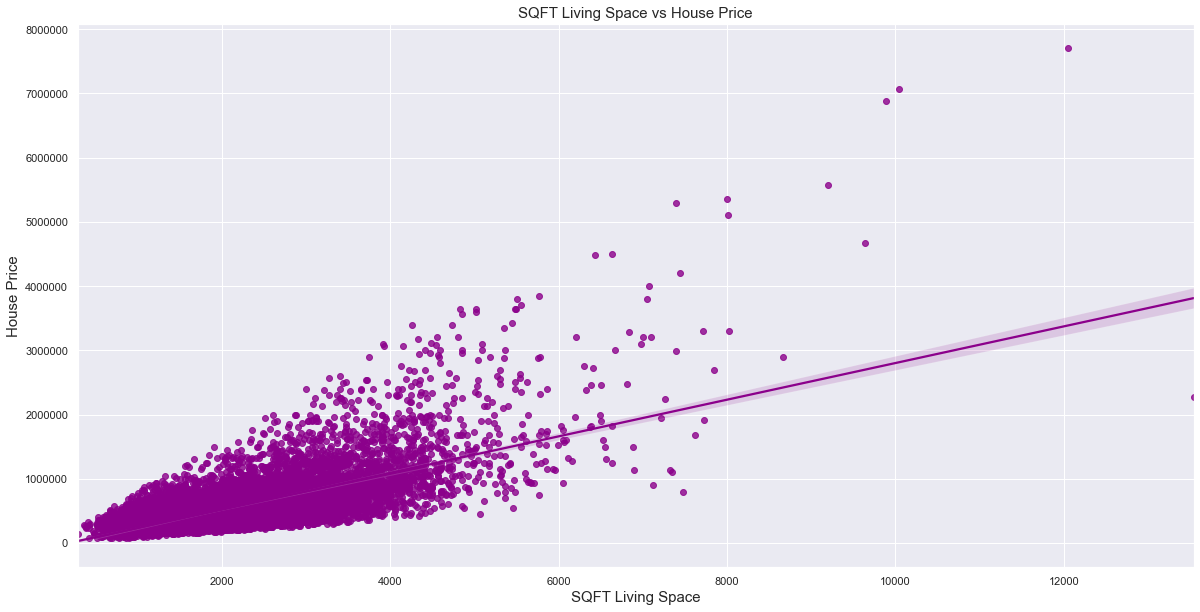

In [18]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.regplot(x =df['sqft_living'], y = df['price'], color = 'darkmagenta' )
ax.set_title('SQFT Living Space vs House Price', fontsize = 15)
ax.set_xlabel('SQFT Living Space', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)

ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

I will cap sqft living space to 6 std above the mean. 

In [19]:
df[df['sqft_living'] > (df['sqft_living'].mean() + (6*df['sqft_living'].std()))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1979,8907500070,20150413T000000,5350000.0,5.0,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2232,2470100110,20140804T000000,5570000.0,5.0,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
3275,1225069038,20140505T000000,2280000.0,7.0,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
3316,3459900230,20141125T000000,1680000.0,4.0,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140,2840,20809
3757,1346300150,20141020T000000,3300000.0,8.0,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
4217,2303900035,20140611T000000,2888000.0,5.0,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
6903,9808700762,20140611T000000,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7183,6072800246,20140702T000000,3300000.0,5.0,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
7519,9208900037,20140919T000000,6885000.0,6.0,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
10366,6762700020,20141013T000000,7700000.0,6.0,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [20]:
sqft_living_cap = df['sqft_living'].mean() + (6*df['sqft_living'].std())
sqft_living_cap

7601.575840208134

In [21]:
df['sqft_living'] = np.where(df['sqft_living'] > sqft_living_cap,
                            sqft_living_cap,
                             df['sqft_living'])

In [22]:
df[df['sqft_living'] > sqft_living_cap]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Bringing in some zipcode income information should help with modeling

In [23]:
zipcodes = pd.read_csv('data/ACSST5Y2019.S1901_data_with_overlays_2021-03-08T095143.csv', index_col = 0, header = 1)

In [24]:
zipcodes.head()

,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Margin of Error!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Margin of Error!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999","Margin of Error!!Households!!Total!!$50,000 to $74,999","Estimate!!Households!!Total!!$75,000 to $99,999","Margin of Error!!Households!!Total!!$75,000 to $99,999","Estimate!!Households!!Total!!$100,000 to $149,999","Margin of Error!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Margin of Error!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more","Margin of Error!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Margin of Error!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Margin of Error!!Households!!Mean income (dollars),Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months,Margin of Error!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!Total,Margin of Error!!Families!!Total,"Estimate!!Families!!Total!!Less than $10,000","Margin of Error!!Families!!Total!!Less than $10,000","Estimate!!Families!!Total!!$10,000 to $14,999","Margin of Error!!Families!!Total!!$10,000 to $14,999","Estimate!!Families!!Total!!$15,000 to $24,999","Margin of Error!!Families!!Total!!$15,000 to $24,999","Estimate!!Families!!Total!!$25,000 to $34,999","Margin of Error!!Families!!Total!!$25,000 to $34,999","Estimate!!Families!!Total!!$35,000 to $49,999","Margin of Error!!Families!!Total!!$35,000 to $49,999","Estimate!!Families!!Total!!$50,000 to $74,999","Margin of Error!!Families!!Total!!$50,000 to $74,999","Estimate!!Families!!Total!!$75,000 to $99,999","Margin of Error!!Families!!Total!!$75,000 to $99,999","Estimate!!Families!!Total!!$100,000 to $149,999",...,"Estimate!!Married-couple families!!Total!!$75,000 to $99,999","Margin of Error!!Married-couple families!!Total!!$75,000 to $99,999","Estimate!!Married-couple families!!Total!!$100,000 to $149,999","Margin of Error!!Married-couple families!!Total!!$100,000 to $149,999","Estimate!!Married-couple families!!Total!!$150,000 to $199,999","Margin of Error!!Married-couple families!!Total!!$150,000 to $199,999","Estimate!!Married-couple families!!Total!!$200,000 or more","Margin of Error!!Married-couple families!!Total!!$200,000 or more",Estimate!!Married-couple families!!Median income (dollars),Margin of Error!!Married-couple families!!Median income (dollars),Estimate!!Married-couple families!!Mean income (dollars),Margin of Error!!Married-couple families!!Mean income (dollars),Estimate!!Married-couple families!!PERCENT ALLOCATED!!Household income in the past 12 months,Margin of Error!!Married-couple families!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Married-couple families!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Married-couple families!!PERCENT ALLOCATED!!Nonfam

In [25]:
zipcodes['zipcode'] = zipcodes['Geographic Area Name'].apply(lambda x: int(x[6:]))

In [26]:
#filter by columns that may be of interest
zipcodes = zipcodes[['Estimate!!Households!!Total','Estimate!!Households!!Median income (dollars)', 'Estimate!!Households!!Mean income (dollars)', 'Estimate!!Families!!Total', 'zipcode']]

In [27]:
df = pd.merge(left = df, right =  zipcodes, on = 'zipcode', how = 'left')

In [28]:
#fix column names for readability
df.rename(columns = {'Estimate!!Households!!Total': 'zip_total_households',
                     'Estimate!!Households!!Median income (dollars)': 'zip_median_income',
                   'Estimate!!Households!!Mean income (dollars)' : 'zip_mean_income',
                   'Estimate!!Families!!Total' : 'zip_total_families'},
                      inplace = True
                        )

In [29]:
df['zip_median_income'] = df['zip_median_income'].astype(int)
df['zip_mean_income'] = df['zip_mean_income'].astype(int)
df['zip_total_households'] = df['zip_total_households'].astype(int)
df['zip_total_families'] = df['zip_total_families'].astype(int)
#new feature


Should i use Median or Mean income by zip code?

In [30]:

df.loc[:,['price', 'zip_median_income', 'zip_mean_income']].corr()

,price,zip_median_income,zip_mean_income
price,1.000000,0.399556,0.514532
zip_median_income,0.399556,1.000000,0.944533
zip_mean_income,0.514532,0.944533,1.000000


zip_mean_income has a higher correlation with price, so I will drop zip_median_income

In [31]:
df.drop(columns = ['zip_median_income'], inplace = True)

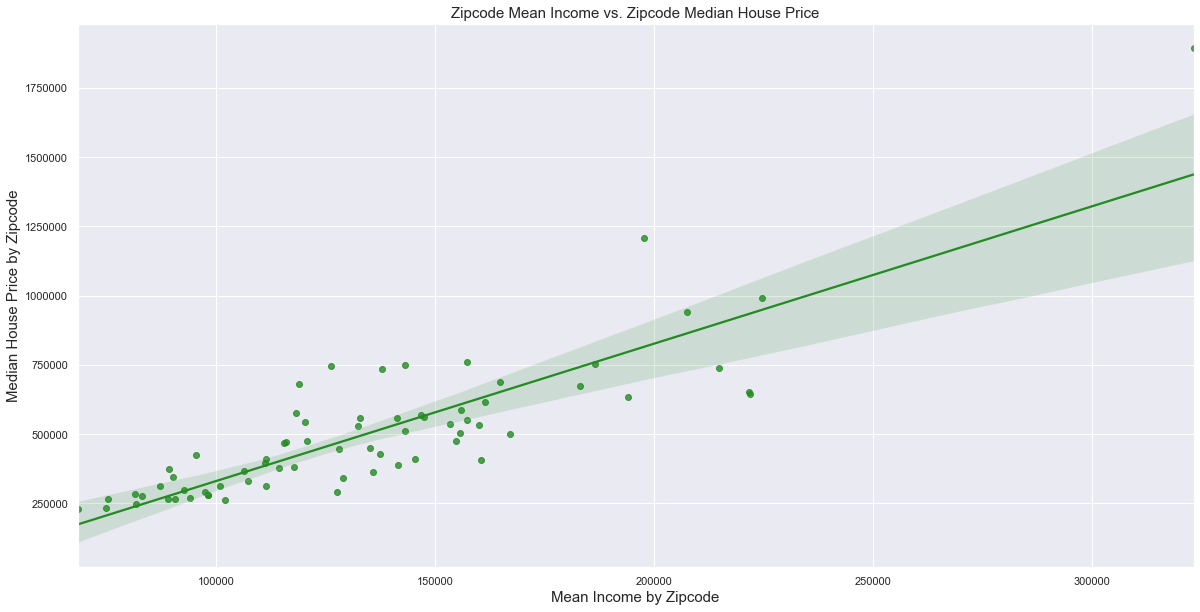

In [32]:
fig,ax = plt.subplots(figsize = (20,10))
x = df.groupby('zip_mean_income').agg({'price': 'median','zip_mean_income': 'mean'})['zip_mean_income']
y = df.groupby('zip_mean_income').agg({'price': 'median','zip_mean_income': 'mean'})['price']
ax = sns.regplot(x,y, color = 'forestgreen')
ax.set_title('Zipcode Mean Income vs. Zipcode Median House Price', fontsize = 15)
ax.set_xlabel('Mean Income by Zipcode', fontsize = 15)
ax.set_ylabel('Median House Price by Zipcode', fontsize = 15)

ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

It definitley seems like pretty strong positive correlation

I will now look into grades

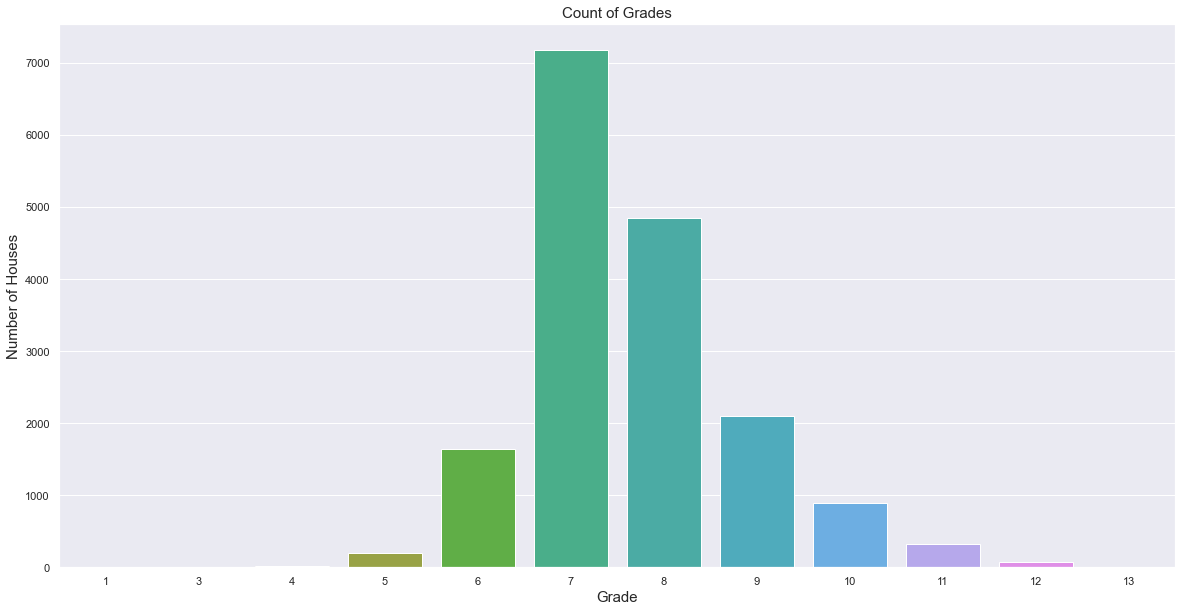

In [33]:
fig,ax = plt.subplots(figsize = (20,10))
x = df.groupby('grade').count()['id'].index
y = df.groupby('grade').count()['id']
# ax.bar(x,y, color = 'g')
ax = sns.barplot(x,y)
ax.set_title('Count of Grades', fontsize = 15)
ax.set_xlabel('Grade', fontsize = 15)
ax.set_ylabel('Number of Houses', fontsize = 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

There are very few houses graded in the 3 to 5 and 11 to 13 range. I will do ANOVA tests to see if mean price of houses in these categories are different

Anova Test on grades 3-5
<br />alpha = .05
<br />Null: Mean house price in categories 3,4 and 5 are equal
<br />Alternative: Mean house price in categories 3 to 5 are not all equal

In [34]:
stats.f_oneway(df[df['grade'] == 3]['price'],
                df[df['grade'] == 4]['price'], 
                df[df['grade'] == 5]['price'],
                )

F_onewayResult(statistic=1.4175688354148162, pvalue=0.24457886978505147)

Since the pvalue of .24 > .05, I can't reject the null. Therefore I will bin houses graded 3 to 5 into one category I will label low_grade

<br /> Now, an ANOVA Test on grades 11 to 13
<br />alpha = .05
<br />Null: Mean house price in categories 11,12 and 13 are equal
<br />Alternative: Mean house price in categories 11 to 13 are not all equal

In [35]:
stats.f_oneway(df[df['grade'] == 11]['price'],
                df[df['grade'] == 12]['price'], 
                df[df['grade'] == 13]['price'],
                )

F_onewayResult(statistic=66.6997835893219, pvalue=1.02252230162574e-25)

Pvalue of this test is smaller than the alpha, therefore I can reject the null hypothesis. As a result, I will leave these grades categorized as is

In [36]:
df['grade_cat'] = np.where(df['grade'] < 6, 'low_grade', df['grade'])

Based on the below boxplot, I can cleary see that grade is an important factor in house price, even exponential as difference of house price distributions is greater in higher grade steps than lower grade steps

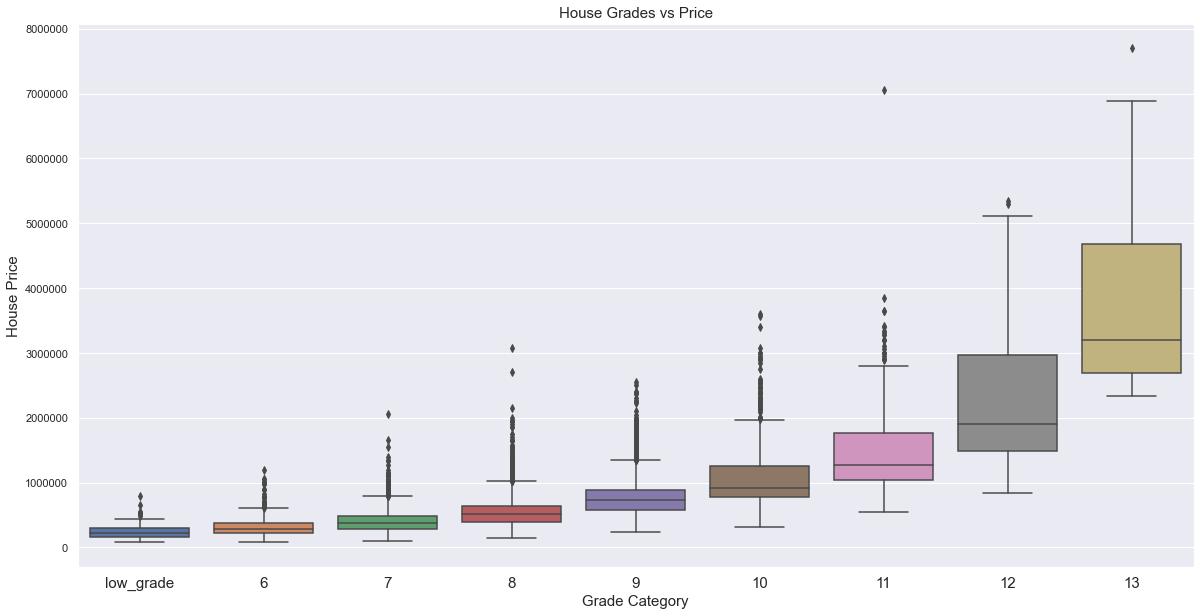

In [37]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x="grade_cat", y="price", data=df.sort_values('price'))
ax.set_title('House Grades vs Price', fontsize = 15)
ax.set_xlabel('Grade Category', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

Now I'll look at views and house price. The below boxplot shows the distribution of housing prices for different view ratings. It is difficult to tell if the distribution of house prices for views 1 and 2 are different

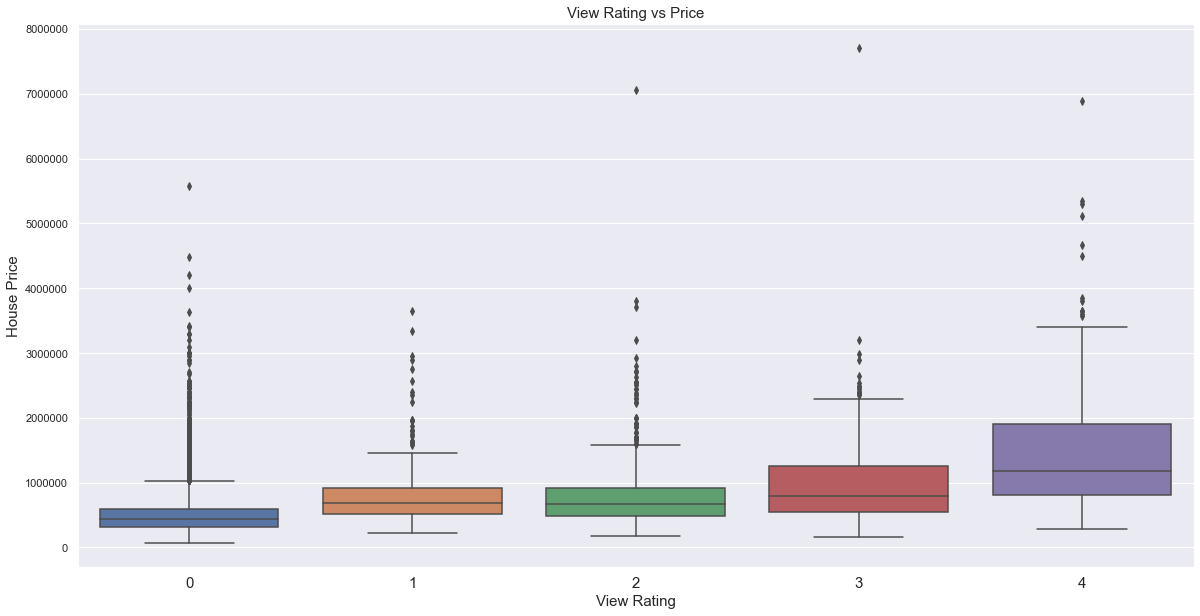

In [38]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x="view", y="price", data=df.sort_values('price'))
ax.set_title('View Rating vs Price', fontsize = 15)
ax.set_xlabel('View Rating', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

To test if I should bin these, I will perform a T Test
<br />alpha = .05
<br />Null: u1 = u2
<br />Alternative u1 != u2


In [39]:
stats.ttest_ind(df[df['view'] == 1]['price'], df[df['view']== 2]['price'], equal_var = True)

Ttest_indResult(statistic=0.9348769437728092, pvalue=0.3500693604625562)

Since pvalue > alpha, I can't reject the null that the distribution of house prices are different. Therefor I will bin views 1 and 2 into one category labeled ok_view and categorize ratings.

In [40]:
conditions = [df['view'] == 0,
              df['view'] == 1,
              df['view'] == 2,
              df['view'] == 3,
              df['view'] == 4
             ]

choices = ['no_view',
           'ok_view',
           'ok_view',
           'good_view',
          'great_view']
           
    

df['view_cat'] = np.select(conditions, choices)

Now there is clearly a difference for each category of view ratings

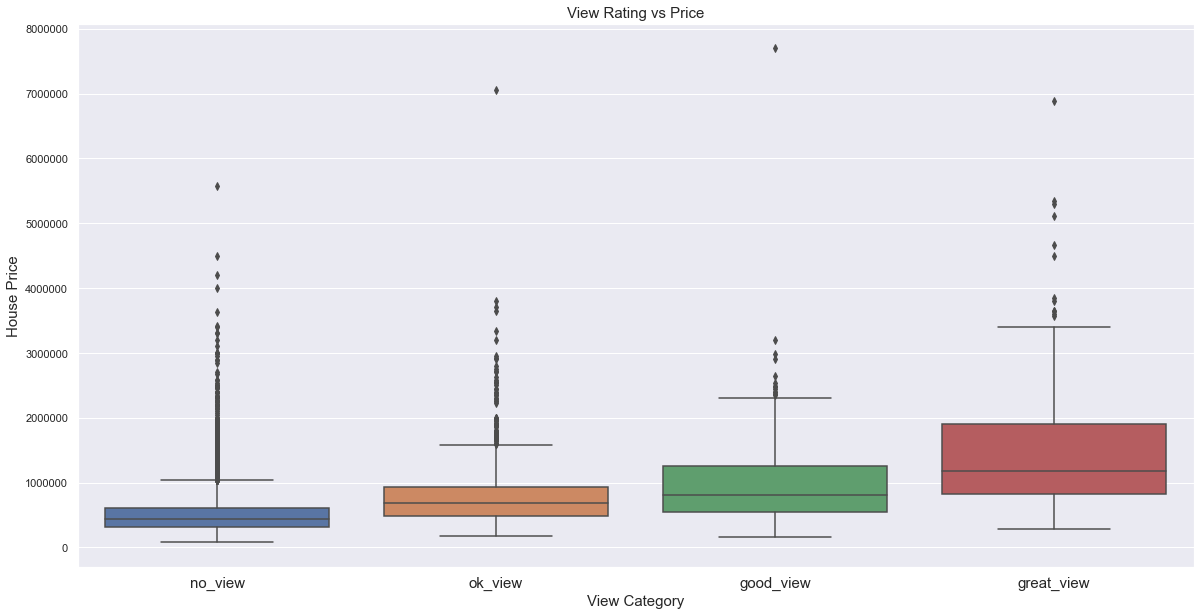

In [41]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x="view_cat", y="price", data=df)
ax.set_title('View Rating vs Price', fontsize = 15)
ax.set_xlabel('View Category', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

## Feature Engineering

Below are some feature I created that may turn out to be useful. Let's explore some of them

In [42]:
#year sold
df['year'] = df['date'].apply(lambda x: int(x[0:4]))

#month sold
df['month_sold'] = df['date'].apply(lambda x: int(x[4:6]))

#most recent year either year built or year renovated
df['year_most_recent_construction'] = np.where(df['yr_renovated'] > df['yr_built'], df['yr_renovated'], df['yr_built'])

#years since most recent construction
df['years_since_most_recent_construction'] = df['year'] - df['year_most_recent_construction']
#take out any negative values
df['years_since_most_recent_construction'] = np.where(df['years_since_most_recent_construction'] <0, 0, df['years_since_most_recent_construction'])

#yard size
df['yard'] = df['sqft_lot'] - (df['sqft_living']/df['floors'])

df['excess_bathrooms'] = np.ceil(df['bathrooms'] - df['bedrooms'])

#ratio of families to household per zipcode. Maybe zipcode where higher ratios of families live, will affect house prices
df['zip_family_ratio'] = df['zip_total_families'] / df['zip_total_households']

I have a theory that having more bathrooms than bedrooms in a house makes it more valuable. People want their own bathrooms and don't want their guests to be in their or their child's personal bathroom. I will categorize it so that I can bin the houses that have significantly more bedrooms than bathrooms and vice versa. Let's see if this feature ends up being relevant

In [43]:
conditions = [df['excess_bathrooms'] <= -2,
              df['excess_bathrooms'] == -1,
              df['excess_bathrooms'] == 0,
              df['excess_bathrooms'] >= 1,

             ]

choices = ['2_or_less',
           '1_less',
           'parity',
           '1_or_more',]
           
    
df['excess_bathrooms_cat'] = np.select(conditions, choices)

Based on the below bar graph, there does seem to be a positive relationship between excess bathrooms and house price.

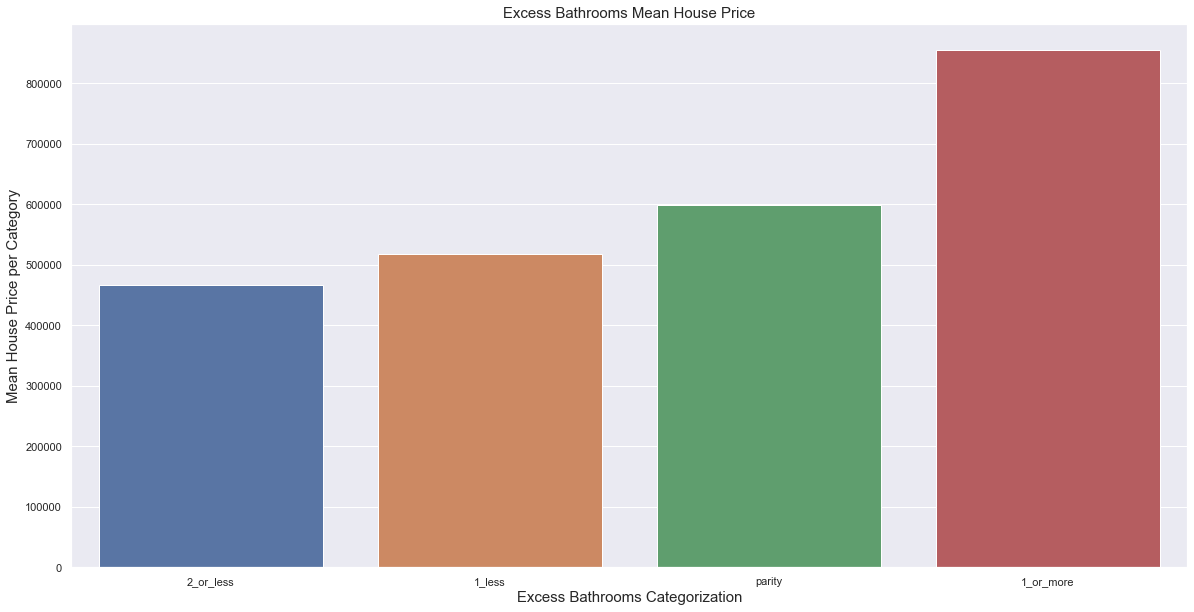

In [44]:
fig,ax = plt.subplots(figsize = (20,10))
x = df.groupby('excess_bathrooms_cat').mean()['price'].sort_values().index
y = df.groupby('excess_bathrooms_cat').mean()['price'].sort_values()
ax = sns.barplot(x,y)
ax.set_title('Excess Bathrooms Mean House Price', fontsize = 15)
ax.set_xlabel('Excess Bathrooms Categorization', fontsize = 15)
ax.set_ylabel('Mean House Price per Category', fontsize = 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

I'm also interested in seaing if season sold affect house price. 

In [45]:
conditions = [df['month_sold'] == 1,
              df['month_sold'] == 2,
              df['month_sold'] == 3,
              df['month_sold'] == 4,
              df['month_sold'] == 5,
              df['month_sold'] == 6,
              df['month_sold'] == 7,
              df['month_sold']  == 8,
              df['month_sold']  == 9,
              df['month_sold']  == 10,
              df['month_sold']  == 11,
              df['month_sold']  == 12
             ]

choices = ['Winter',
           'Winter',
           'Spring',
           'Spring',
           'Spring',
          'Summer',
          'Summer',
          'Summer',
          'Fall',
          'Fall',
          'Fall',
          'Winter']
           
    
df['season_sold'] = np.select(conditions, choices, default = np.NaN)

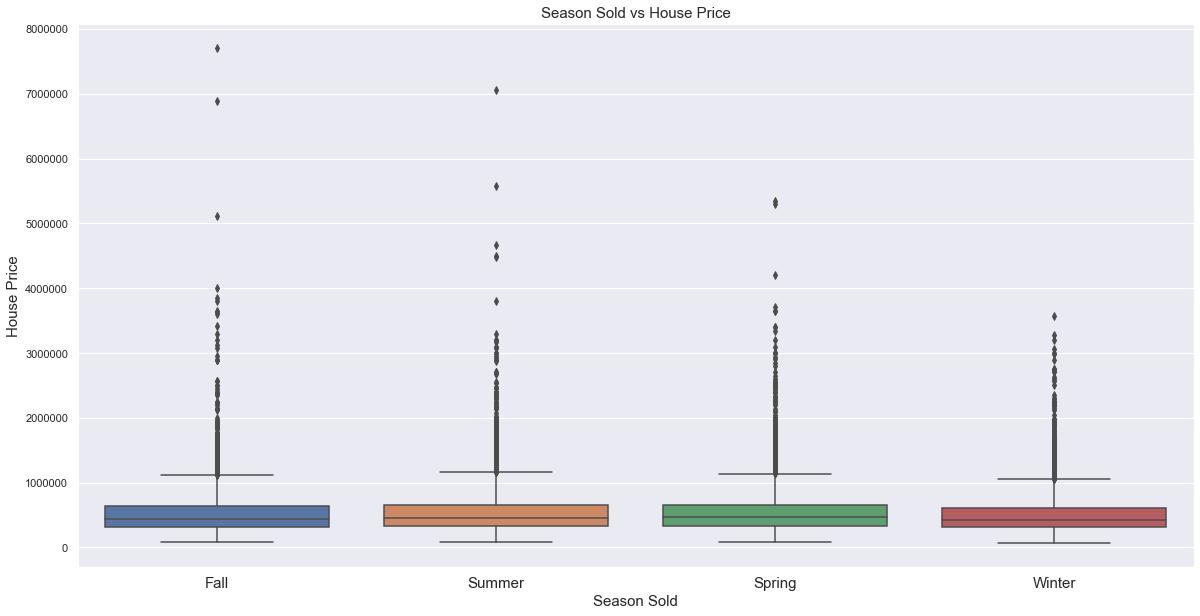

In [46]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x="season_sold", y="price", data=df)
ax.set_title('Season Sold vs House Price', fontsize = 15)
ax.set_xlabel('Season Sold', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

It's tough to tell based on the above boxplot if there is any difference. I will do an ANOVA test to see if there is any signifinance.

ANOVA Test
<br />alpha = .05
<br />Null: Mean house price is equal for all season sold
<br />Alternative: Mean house price is not equal for all seasons sold


In [47]:
stats.f_oneway(df[df['season_sold'] == 'Winter']['price'],
                df[df['season_sold'] == 'Spring']['price'], 
                df[df['season_sold'] == 'Summer']['price'],
               df[df['season_sold'] == 'Fall']['price'],
                )

F_onewayResult(statistic=6.882461546105219, pvalue=0.00012530436472821217)

Since pvalue of 0.00012 is greater than alpha, I can reject the null. There is a statistically significant difference in mean house prices depending on season sold. I will keep this category and see if any of the models utilize this later. 

I also want to see if decade built has any affect on house price

In [48]:
df['decade_built'] = df['yr_built'].apply(lambda x: str(x)[0:3]+'0s')

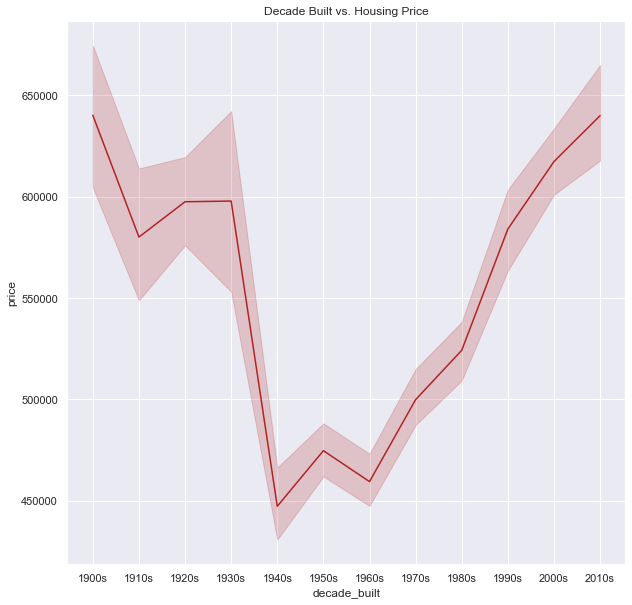

In [49]:
ax = sns.lineplot(x = 'decade_built', y = 'price', data = df, color = 'firebrick')
ax.set_title('Decade Built vs. Housing Price')
plt.show()

Based on the above line chart, houses built before the 40's sell for higher prices today than houses built in subsequent decades This is somewhat surprising. There must be some legacy architectural or building material appeal to these old houses or maybe there is some survivorship bias that if they haven’t been leveled and turned into new construction yet, they are appealing houses worthy of being saved. There's some variation between 1900 and 1930 but house built these years still seem to be more similar than any built in 1940 and thereafter. I'll bin houses built 1900-1930 in a category I'll call Pre-war. Outside of the Pre-War it appear newer construction is king.

In [50]:
conditions = [df['decade_built'] == '1900s',
              df['decade_built'] == '1910s',
              df['decade_built'] == '1920s',
              df['decade_built'] == '1930s',
             ]

choices = ['Pre-war',
           'Pre-war',
           'Pre-war',
           'Pre-war']
           
    


df['decade_built_adjusted'] = np.select(conditions, choices, default = df['decade_built'])

I am creating the below interaction features that I think may have some potential in a model

In [51]:
df['zip_incomeXsqft_living'] = df['zip_mean_income'] * df['sqft_living']
df['waterfrontXsqft_living'] = df['waterfront'] * df['sqft_living']
df['zip_incomeXsqft_lot'] = df['zip_mean_income'] * df['sqft_lot']
df['sqft_living^2'] = df['sqft_living']**2
df['year_since_mrcXgrade'] = df['years_since_most_recent_construction'] * df['grade']
df['yearsince_mrcXcondition'] = df['years_since_most_recent_construction'] * df['condition']
df['yearsince_mrcXsqft_living'] = df['years_since_most_recent_construction']  * df['sqft_living']
df['waterfront_view'] = df['waterfront'] * df['view']

And I'll create dummy variables for my categorical data.

In [52]:
df_dummy = pd.get_dummies(df, columns=['season_sold', 'condition'], drop_first=True)
df_dummy = pd.get_dummies(df_dummy, columns = ['grade_cat']).drop(columns = 'grade_cat_low_grade', axis = 1)
df_dummy = pd.get_dummies(df_dummy, columns = ['view_cat']).drop(columns = 'view_cat_no_view', axis = 1)
df_dummy = pd.get_dummies(df_dummy, columns = ['excess_bathrooms_cat']).drop(columns = 'excess_bathrooms_cat_parity', axis = 1)
df = pd.get_dummies(df_dummy, columns = ['decade_built_adjusted']).drop(columns = 'decade_built_adjusted_2010s', axis = 1)

In [53]:
#dropping columns I preferred to categorize
df.drop(columns = ['decade_built', 'excess_bathrooms'], inplace = True)

---

Writing functions to quickly get testing and training RMSE's and residuals plots on my models for both price and log price

In [54]:
def test_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 15, test_size=0.2)
    #instantiate a linear regression object
    lm = LinearRegression()
    #fit the linear regression to the data
    lm = lm.fit(X_train, y_train)

    y_train_pred = lm.predict(X_train)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #use fitted model to predict on the test examples
    y_test_pred = lm.predict(X_test)

    #evaluate the predictions on the test examples
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    return {'train_rmse': train_rmse, 'test_rmse' : test_rmse}

In [55]:
def test_data_log_target(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 15, test_size=0.2)
    
    y_log = np.log(y_train)
    #instantiate a linear regression object
    lm_log = LinearRegression()
    #fit the linear regression to the data
    lm_log = lm_log.fit(X_train, y_log)

    log_train_pred  = lm_log.predict(X_train)
    #exp the predictions to get them on the same original scale 
    y_train_pred = np.exp(log_train_pred)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #use fitted model to predict on the test examples
    
    log_test_pred = lm_log.predict(X_test)
    #get test predictions back to original scale
    y_test_pred = np.exp(log_test_pred)
    
    #evaluate the predictions on the test examples
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    return {'train_rmse': train_rmse, 'test_rmse' : test_rmse}

In [56]:
def residual_plot(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 15, test_size=0.2)
    #instantiate a linear regression object
    lm = LinearRegression()
    #fit the linear regression to the data
    lm = lm.fit(X_train, y_train)

    y_train_pred = lm.predict(X_train)

    
    #use fitted model to predict on the test examples
    y_test_pred = lm.predict(X_test)

    sns.residplot( y_test, y_test_pred,lowess=True, color="g")
    
    plt.show()
    return None

In [57]:
def residual_plot_log(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 15, test_size=0.2)
    
    y_log = np.log(y_train)
    #instantiate a linear regression object
    lm_log = LinearRegression()
    #fit the linear regression to the data
    lm_log = lm_log.fit(X_train, y_log)

    log_train_pred  = lm_log.predict(X_train)
    #log_train_pred the predictions to get them on the same original scale 
    y_train_pred = np.exp(log_train_pred)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #use fitted model to predict on the test examples
    
    log_test_pred = lm_log.predict(X_test)
    #get test predictions back to original scale
    y_test_pred = np.exp(log_test_pred)
    
    #evaluate the predictions on the test examples
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

    sns.residplot( y_test, y_test_pred,lowess=True, color="g")
    
    plt.show()
    return None

Now let's build some models!

### Basic Model 

I hand selected the below features personally based on my EDA. I chose sqft_living and excluded other features such as bedrooms, bathrooms, and sqft_above because sqft_living had the highest correlation to price and I wanted to avoid issues with multicollinearity. Similarly I excluded waterfront because all the waterfront houses had a view of at least 1 and most had a view of 4. So the views category should account for these houses. 

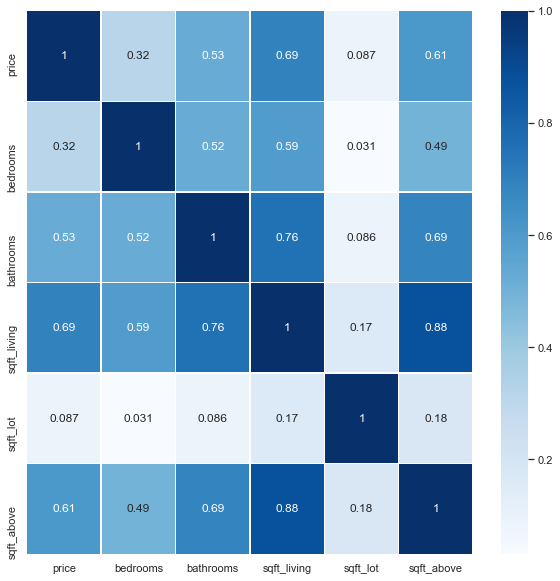

In [58]:
sns.heatmap(df[['price', 
   'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above']].corr().applymap(abs), linewidths=.5, cmap="Blues", annot = True)
plt.show()

In [59]:
df[df['waterfront']==1]['view'].value_counts()

4    114
3     16
2      7
1      1
Name: view, dtype: int64

In [60]:
features= [
 'sqft_living',
 'zip_mean_income',
 'view_cat_great_view',
 'view_cat_good_view',
 'view_cat_ok_view',
 'excess_bathrooms_cat_2_or_less',
 'excess_bathrooms_cat_1_less',
 'excess_bathrooms_cat_1_or_more',
 'decade_built_adjusted_Pre-war',
 'decade_built_adjusted_1940s',
 'decade_built_adjusted_1950s',
 'decade_built_adjusted_1960s',
 'decade_built_adjusted_1970s',
 'decade_built_adjusted_1980s',
 'decade_built_adjusted_1990s',
 'decade_built_adjusted_2000s',
 'grade_cat_6',
 'grade_cat_7',
 'grade_cat_8',
 'grade_cat_9',
 'grade_cat_10',
 'grade_cat_11',
 'grade_cat_12',
 'grade_cat_13'
]

df_features = df[features]

target = df['price']

In [61]:
test_data(df_features, target)

{'train_rmse': 196090.98148453448, 'test_rmse': 176947.49146244617}

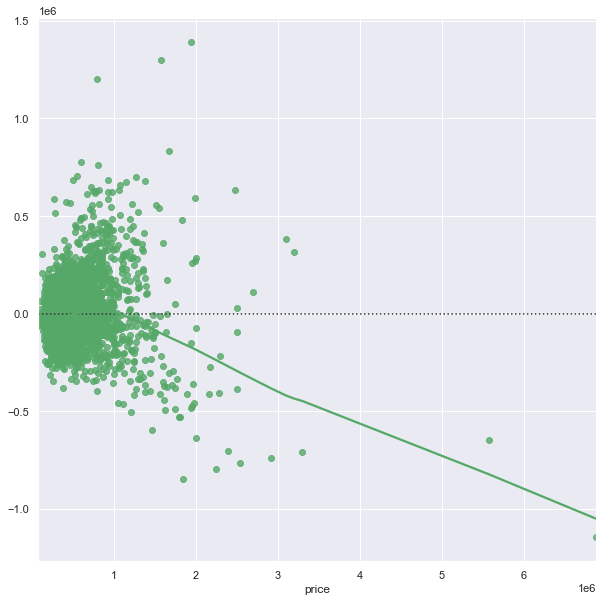

In [62]:
residual_plot(df_features, target)

My initial RMSE on the training data is under 200k. Pretty good. Lets see what logging the price does on these same features. 

In [63]:
test_data_log_target(df_features, target)

{'train_rmse': 186494.92810235757, 'test_rmse': 183771.6787668403}

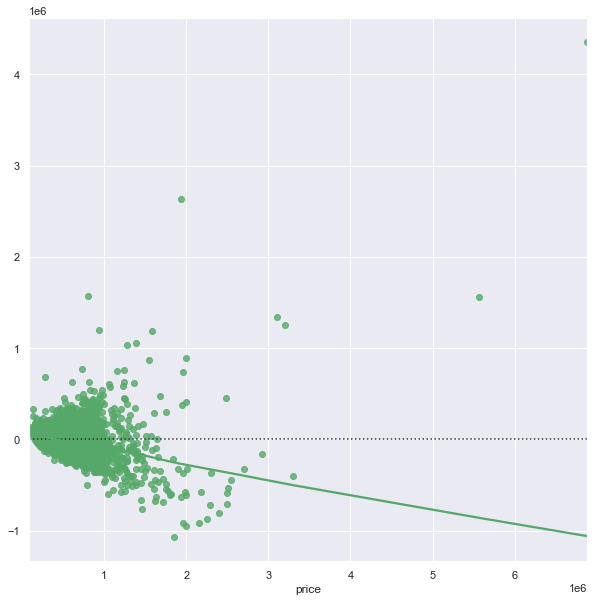

In [64]:
residual_plot_log(df_features, target)

Tough to tell if logging price worked. It did better on the training data but worse on the testing. Still the model variance was better when logging price and residual plot looks a bit better.

---


Let's try select K Best on the all the basic features to see if that will come up with some better result than what I personally selected

In [65]:
df_Kbasic = df.drop(columns = ['price', 'id', 'date', 'lat', 'long', 'zipcode', 'grade', 'view'], axis = 1)

target = df['price']

In [66]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

X_train, X_test, y_train, y_test = train_test_split(df_Kbasic, target, random_state = 15, test_size=0.2)

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7faa2b4a58b0>)

In [67]:
selector.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True, False, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False])

In [68]:
selected_columns = X_train.columns[selector.get_support()]


In [69]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'sqft_living15',
 'zip_mean_income',
 'year_most_recent_construction',
 'years_since_most_recent_construction',
 'zip_incomeXsqft_living',
 'waterfrontXsqft_living',
 'zip_incomeXsqft_lot',
 'sqft_living^2',
 'yearsince_mrcXsqft_living',
 'waterfront_view',
 'grade_cat_10',
 'grade_cat_11',
 'grade_cat_12',
 'grade_cat_13',
 'grade_cat_6',
 'grade_cat_7',
 'grade_cat_9',
 'view_cat_good_view',
 'view_cat_great_view',
 'view_cat_ok_view',
 'excess_bathrooms_cat_1_or_more',
 'excess_bathrooms_cat_2_or_less']

In [70]:
test_data(df[selected_columns], target)

{'train_rmse': 180465.86174293744, 'test_rmse': 169043.3808708333}

Pretty good! Lowest test RMSE so far.

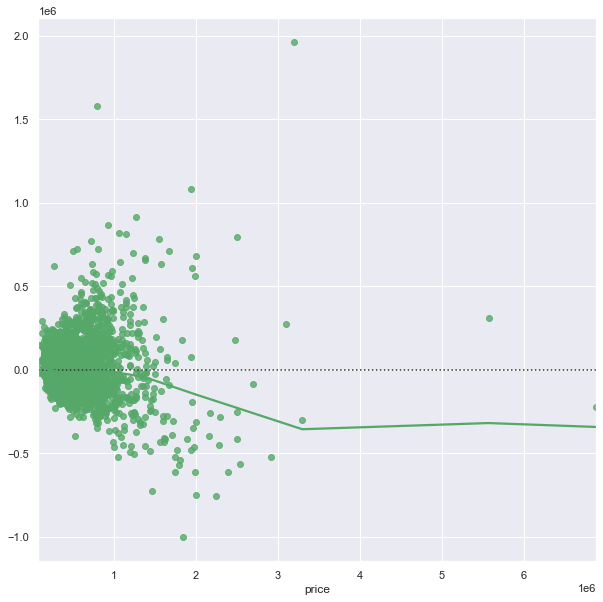

In [71]:
residual_plot(df[selected_columns], target)

Let's test the K best on log price

In [72]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, np.log(y_train))

SelectKBest(k=30, score_func=<function f_regression at 0x7faa2b4a58b0>)

In [73]:
selected_columns = X_train.columns[selector.get_support()]

In [74]:
test_data_log_target(df[selected_columns], target)

{'train_rmse': 197231.95741423278, 'test_rmse': 200159.10155637003}

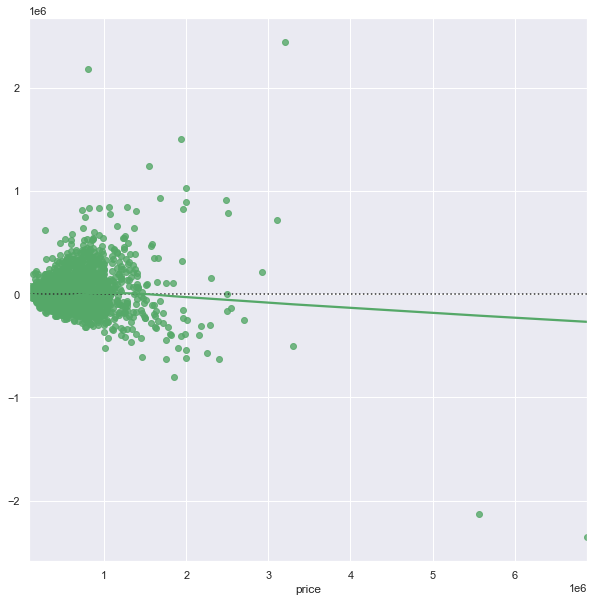

In [75]:
residual_plot_log(df[selected_columns], target)

Not as good this time around

Let's try iterating through different K's do see if I can find the best number K

In [76]:
len(df_Kbasic.columns)

58

In [77]:
kbest_result = pd.DataFrame(columns = ['k', 'log_price','train_rmse','test_rmse' ])
X_train, X_test, y_train, y_test = train_test_split(df_Kbasic, target, random_state = 15, test_size=0.2)

In [78]:
for n in range(5,55):
    selector = SelectKBest(f_regression, k=n)

    selector.fit(X_train, y_train)
    
    selected_columns = X_train.columns[selector.get_support()]
    
    train_rmse = test_data(df[selected_columns], target)['train_rmse']
    
    test_rmse = test_data(df[selected_columns], target)['test_rmse']
    
    kbest_result = kbest_result.append({'k': n, 'log_price' : 'no', 'train_rmse': train_rmse, 'test_rmse': test_rmse}, ignore_index = True)
    


And for completeness lets do the same but log price

In [79]:
for n in range(5,55):
    selector = SelectKBest(f_regression, k=n)

    selector.fit(X_train, np.log(y_train))
    
    selected_columns = X_train.columns[selector.get_support()]
    
    train_rmse = test_data_log_target(df[selected_columns], target)['train_rmse']
    
    test_rmse = test_data_log_target(df[selected_columns], target)['test_rmse']
    
    kbest_result  = kbest_result.append({'k': n, 'log_price' : 'yes', 'train_rmse': train_rmse, 'test_rmse': test_rmse}, ignore_index = True)

In [80]:
kbest_result.sort_values('test_rmse').head(10)

,k,log_price,train_rmse,test_rmse
93,48,yes,139636.046601,128780.048249
94,49,yes,139614.891184,128810.175888
96,51,yes,139612.651460,128827.634291
95,50,yes,139624.590924,128837.172477
99,54,yes,139670.014647,128882.615932
92,47,yes,139758.301203,128888.511036
97,52,yes,139682.001006,128934.508208
98,53,yes,139697.598944,128972.307276
91,46,yes,139874.339987,129090.359173
90,45,yes,140393.147735,129129.792645


Seems like 48 features along with logging price hits the sweet spot of lower test_rmse, train_rmse is correspondigly low as well so I am not overly concerned about the variance. But with 49 features, there still may be some overfitting occuring. 

Lets see the residual plot for that regression

{'train_rmse': 139636.04660122035, 'test_rmse': 128780.04824933832}

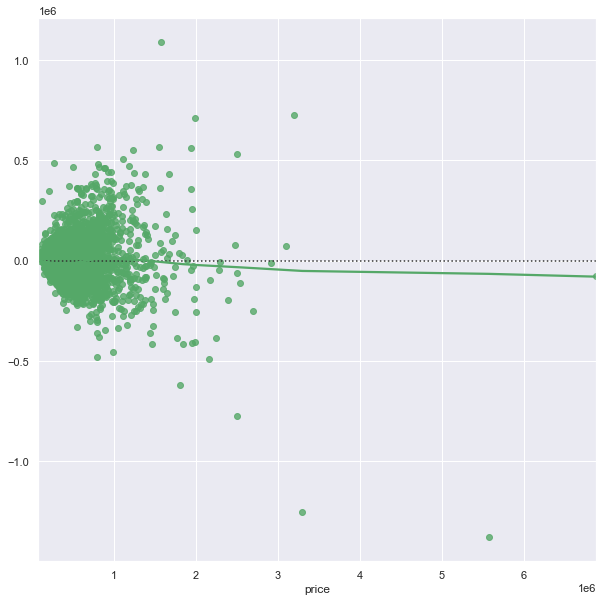

In [81]:
selector = SelectKBest(f_regression, k=48)

selector.fit(X_train, np.log(y_train))

selected_columns = X_train.columns[selector.get_support()]

display(test_data_log_target(df[selected_columns], target))

residual_plot_log(df[selected_columns], target)

That's a relatively decent looking residual plot! 

---

Now let's try recursive feature elimination

In [82]:
from sklearn.feature_selection import RFECV

In [83]:
df_rfe = df.drop(columns = ['price', 'id', 'date', 'lat', 'long', 'zipcode', 'grade', 'view'], axis = 1)

target = df['price']

X_train, X_test, y_train, y_test = train_test_split(df_rfe, target, random_state = 15, test_size=0.2)

In [84]:
df_rfe

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zip_total_households,zip_mean_income,zip_total_families,year,month_sold,year_most_recent_construction,years_since_most_recent_construction,yard,zip_family_ratio,zip_incomeXsqft_living,waterfrontXsqft_living,zip_incomeXsqft_lot,sqft_living^2,year_since_mrcXgrade,yearsince_mrcXcondition,yearsince_mrcXsqft_living,waterfront_view,season_sold_Spring,season_sold_Summer,season_sold_Winter,condition_2,condition_3,condition_4,condition_5,grade_cat_10,grade_cat_11,grade_cat_12,grade_cat_13,grade_cat_6,grade_cat_7,grade_cat_8,grade_cat_9,view_cat_good_view,view_cat_great_view,view_cat_ok_view,excess_bathrooms_cat_1_less,excess_bathrooms_cat_1_or_more,excess_bathrooms_cat_2_or_less,decade_built_adjusted_1940s,decade_built_adjusted_1950s,decade_built_adjusted_1960s,decade_built_adjusted_1970s,decade_built_adjusted_1980s,decade_built_adjusted_1990s,decade_built_adjusted_2000s,decade_built_adjusted_Pre-war
0,4.0,2.25,2070.0,8893,2.0,0,2070,0,1986,0,2390,7700,15830,107395,11422,2014,10,1986,28,7858.000000,0.721541,222307650.0,0.0,955063735,4284900.0,224,112,57960.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,5.0,3.00,2900.0,6730,1.0,0,1830,1070,1977,0,2370,6283,22922,147430,12426,2014,8,1977,37,3830.000000,0.542099,427547000.0,0.0,992203900,8410000.0,296,185,107300.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,4.0,2.50,3770.0,10893,2.0,0,3770,0,1997,0,3710,9685,13337,186548,10531,2014,8,1997,17,9008.000000,0.789608,703285960.0,0.0,2032067364,14212900.0,187,51,64090.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,3.0,3.50,4560.0,14608,2.0,0,4560,0,1990,0,4050,14226,17646,128063,11334,2015,3,1990,25,12328.000000,0.642299,583967280.0,0.0,1870744304,20793600.0,300,75,114000.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,3.0,2.50,2550.0,5376,2.0,0,2550,0,2004,0,2250,4050,28022,161369,18806,2014,7,2004,10,4101.000000,0.671116,411490950.0,0.0,867519744,6502500.0,90,30,25500.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5.0,2.50,3240.0,9960,1.0,0,2020,1220,1958,0,2730,10400,9278,157380,6934,2015,3,1958,57,6720.000000,0.747359,509911200.0,0.0,1567504800,10497600.0,456,171,184680.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
17286,2.0,1.75,1300.0,4000,2.0,0,1300,0,1948,0,1350,4013,17146,118967,6322,2014,5,1948,66,3350.000000,0.368716,154657100.0,0.0,475868000,1690000.0,462,198,85800.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17287,3.0,1.00,1050.0,9876,1.0,0,1050,0,1953,0,1760,9403,8876,135105,6072,2014,5,1953,61,8826.000000,0.684092,141860250.0,0.0,1334296980,1102500.0,427,183,64050.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
17288,3.0,1.50,1900.0,43186,1.5,0,1300,600,1971,0,2080,108028,12127,128993,9706,2014,12,1971,43,41919.333333,0.800363,245086700.0,0.0,5570691698,3610000.0,301,172,81700.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [85]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [86]:
selected_rfe = X_train.columns[selector.support_]


In [87]:
len(list(selected_rfe))

58

In [88]:
selected_rfe

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'zip_total_households',
       'zip_mean_income', 'zip_total_families', 'year', 'month_sold',
       'year_most_recent_construction', 'years_since_most_recent_construction',
       'yard', 'zip_family_ratio', 'zip_incomeXsqft_living',
       'waterfrontXsqft_living', 'zip_incomeXsqft_lot', 'sqft_living^2',
       'year_since_mrcXgrade', 'yearsince_mrcXcondition',
       'yearsince_mrcXsqft_living', 'waterfront_view', 'season_sold_Spring',
       'season_sold_Summer', 'season_sold_Winter', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_cat_10',
       'grade_cat_11', 'grade_cat_12', 'grade_cat_13', 'grade_cat_6',
       'grade_cat_7', 'grade_cat_8', 'grade_cat_9', 'view_cat_good_view',
       'view_cat_great_view', 'view_cat_ok_view',
       'excess_bathrooms_cat_1_less', 'exc

In [89]:
test_data(df[selected_rfe], df['price'])

{'train_rmse': 151516.07718355404, 'test_rmse': 137803.9565328016}

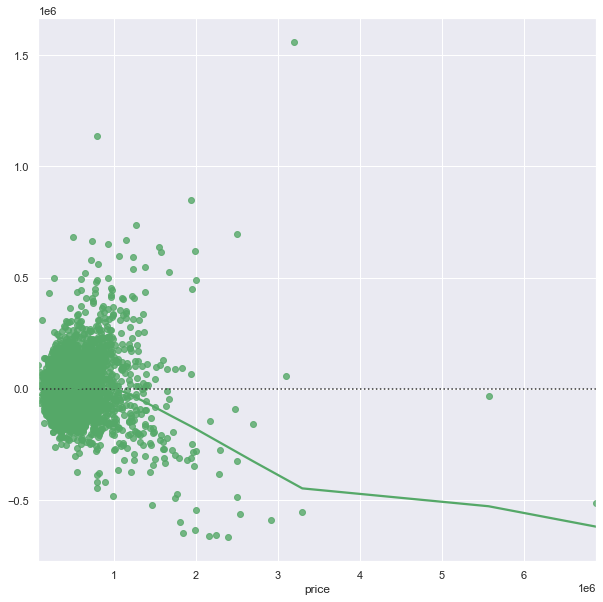

In [90]:
residual_plot(df[selected_rfe], df['price'])

Better than the basic model but worse than my best Kbest model

Now let try that with log price which has had some success so far with other models

In [91]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, np.log(y_train))

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [92]:
selected_rfe = X_train.columns[selector.support_]

In [93]:
len(list(selected_rfe))

58

In [94]:
selected_rfe

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'zip_total_households',
       'zip_mean_income', 'zip_total_families', 'year', 'month_sold',
       'year_most_recent_construction', 'years_since_most_recent_construction',
       'yard', 'zip_family_ratio', 'zip_incomeXsqft_living',
       'waterfrontXsqft_living', 'zip_incomeXsqft_lot', 'sqft_living^2',
       'year_since_mrcXgrade', 'yearsince_mrcXcondition',
       'yearsince_mrcXsqft_living', 'waterfront_view', 'season_sold_Spring',
       'season_sold_Summer', 'season_sold_Winter', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_cat_10',
       'grade_cat_11', 'grade_cat_12', 'grade_cat_13', 'grade_cat_6',
       'grade_cat_7', 'grade_cat_8', 'grade_cat_9', 'view_cat_good_view',
       'view_cat_great_view', 'view_cat_ok_view',
       'excess_bathrooms_cat_1_less', 'exc

In [95]:
test_data_log_target(df[selected_rfe], df['price'])

{'train_rmse': 139304.1680792552, 'test_rmse': 128703.29392827}

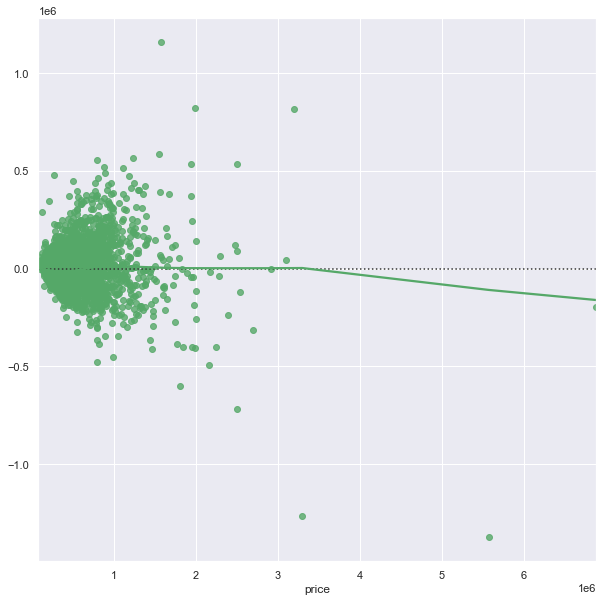

In [96]:
residual_plot_log(df[selected_rfe], df['price'])

The RFE Feature selection with log price got very comparable RMSE scores to my best K best model. However it didn't eliminate any features. This makes me think it may be overfitting slightly more than the best K best model. I am doubtful that 100% of the features fed into the model would be appropriate. 

## Final Model ##

The best K best with 48 features and logging the price was the best model with the lowest test and training RMSE, that I have the most confidence in. I will refit the features against all the data and sanity check the predictions.

In [97]:
best_kbest = LinearRegression()

best_kbest = best_kbest.fit(df[selected_columns], np.log(df['price']))

best_kbest_pred = np.exp(best_kbest.predict(df[selected_columns]))

rmse = np.sqrt(metrics.mean_squared_error(df['price'], best_kbest_pred))

display(rmse)

preds = pd.DataFrame(best_kbest_pred)

display(preds.describe())

display(df.describe()['price'])

136761.64928311025

,0
count,1.729000e+04
mean,5.305961e+05
std,3.404109e+05
min,1.275103e+05
25%,3.236583e+05
50%,4.430527e+05
75%,6.222292e+05
max,6.786242e+06


count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

No negative values; means and quartiles are in the ballpark. Overall I think I did pretty well.

In [98]:
len(best_kbest.coef_)

48

In [99]:
best_kbest.intercept_

-104.97630032186937

In [100]:
selected_columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'zip_mean_income', 'zip_total_families',
       'year_most_recent_construction', 'years_since_most_recent_construction',
       'yard', 'zip_family_ratio', 'zip_incomeXsqft_living',
       'waterfrontXsqft_living', 'zip_incomeXsqft_lot', 'sqft_living^2',
       'yearsince_mrcXcondition', 'yearsince_mrcXsqft_living',
       'waterfront_view', 'season_sold_Winter', 'condition_2', 'condition_5',
       'grade_cat_10', 'grade_cat_11', 'grade_cat_12', 'grade_cat_13',
       'grade_cat_6', 'grade_cat_7', 'grade_cat_8', 'grade_cat_9',
       'view_cat_good_view', 'view_cat_great_view', 'view_cat_ok_view',
       'excess_bathrooms_cat_1_less', 'excess_bathrooms_cat_1_or_more',
       'excess_bathrooms_cat_2_or_less', 'decade_built_adjusted_1940s',
       'decade_built_adjusted_1950s', 'decade_built_adjusted_19

### Save My Final Model and Other Info

In [ ]:
import pickle


pickle_out = open("data/model.pickle","wb")
pickle.dump(best_kbest, pickle_out)
pickle_out.close()

In [ ]:
other_info = [bathroom_per_sqftl, bedrooms_per_sqftl, sqft_living_cap, selected_columns]

In [ ]:
pickle_out = open('data/other_info.pickle', "wb")
pickle.dump(other_info, pickle_out)
pickle_out.close()